In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
    # per desfer la opció: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

In [2]:
rounddf=pd.read_csv("ronda.csv")
sessiondf=pd.read_csv("partida.csv")
userdf=pd.read_csv("user.csv")
userrounddf=pd.read_csv("userronda.csv")
qadf=pd.read_excel("QuestionsAnswersSurvey.xls")
display(userdf)

,id,codi_postal,genere,rang_edat,nivell_estudis,situacio_laboral,estat_civil,acabat,diners_inicials,num_seleccions,guany_final,partida_id,origen,pais,residencia,enquesta_final_pr1,enquesta_final_pr2,enquesta_final_pr3,enquesta_final_pr4,enquesta_final_pr5,enquesta_final_pr6,enquesta_final_pr7,enquesta_final_pr8,enquesta_final_pr9,enquesta_final_pr10,enquesta_final_pr11,enquesta_final_pr12,enquesta_final_pr13,bots
0,1,8840,F,r6,r2,r1,r1,1,40,10,24,1.0,r1,Spain,r1,r1,r1,r4,r1 r5,r2,r9,r7,r4,r2,r1,r2,r3,Mas plantas y que los nií±os tengan mas espaci...,0
1,2,8840,M,r6,r7,r1,r4,1,40,10,20,1.0,r1,Spain,r1,r1,r2,r1,r1 r3,r1,na,r3,r5,r1,r1,r1,r1 r2 r3 r4,Todo zona peatonal\r\r,0
2,3,8840,M,r7,r4,r1,r2,1,40,10,10,1.0,r1,Spain,r1,r1,r1,r3,r1 r4,r2,r11,r2,r3,r1,r2,r1,r5,La mejora en la pavimentacion,0
3,4,8840,F,r7,r2,r1,r5,0,40,6,0,1.0,r1,Spain,r1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,8840,M,r4,r6,r3,r2,1,40,10,20,1.0,r2,Chile,r1,r1,r2,r3,r5,r1,na,r2,r2,r4,r4,r2,r1,Un parque mas grande zonas verdee,0
5,6,8840,M,r7,r7,r1,r2,0,40,9,16,1.0,r1,Spain,r1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,7,8840,M,r4,r5,r3,r1,1,40,10,16,2.0,r1,Spain,r1,r1,r2,r3,r1 r2 r4,r2,r8,r5,r3,r5,r1,r3,r2 r5,\r\rFuemtes\r\r,0
7,8,8719,M,r4,r6,r2,r4,1,40,10,18,2.0,r1,Spain,r1,r5,r4,r6,r6,r2,r9,r3,r2,r5,r4,r4,r5,Flors,0
8,9,8840,M,r6,r4,r3,r2,1,40,10,30,2.0,r1,Spain,r1,r1,r2,r4,r1,r1,na,r4,r3,r5,r2,r3,r6,ESpacio verde\r\r,0
9,10,8840,M,r5,r3,r3,r2,1,40,10,22,2.0,r1,Spain,r1,r1,r2,r5,r1 r4,r2,r6,r4,r2,r5,r4,r3,r2,Tiendas de ropa y accesorios para decorar,0


In [3]:
# no es poden fer perquè no hi ha registre del temps:
    # mean time for each round with violinplot
    # correlation between time and round with threshold achieved
    # mean time depending on gender
    # mean time depending on contribution
# no té sentit perquè tothom comença amb la mateixa quantitat:
    # mean end capital as a function of start capital
    # relative contributions as a function of start capital with boxplot

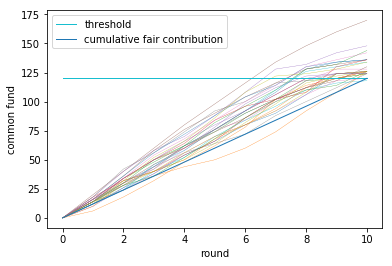

In [7]:
# evolution of funds through the rounds
roundi=list(range(0,11))
roundlist=(0,1,2,3,4,5,6,7,8,9,10)
for i in range(1,len(sessiondf)):
    roundi=rounddf.loc[rounddf["session_id"]==i]
    roundi=roundi[["end_pot"]]
    roundi.index=roundi.index%10
    roundi.loc[-1] = [120]
    roundi.index = roundi.index + 1
    roundi.sort_index(inplace=True)
    for j in range (0,11):
        roundi.loc[j]=120-roundi.loc[j]
    plt.plot(roundlist,roundi,lw=0.3)
plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
plt.xlabel("round")
plt.ylabel("common fund")
plt.legend()
plt.show()

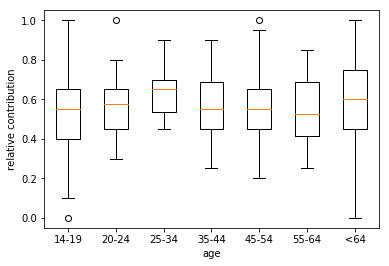

In [22]:
# relative contribution dependence on age
data=[[],[],[],[],[],[],[]]
for k in range(7):
    for i in range(len(userdf)):
        if (int(userdf.loc[i,"rang_edat"][1:])==(k+1) and userdf.loc[i,"diners_inicials"]!=0):
            data[k].append(1-userdf.loc[i,"guany_final"]/userdf.loc[i,"diners_inicials"])
plt.boxplot(data,positions=[1,2,3,4,5,6,7])
plt.xticks([1,2,3,4,5,6,7],["14-19","20-24","25-34","35-44","45-54","55-64","<64"])
plt.xlabel("age")
plt.ylabel("relative contribution")
plt.show()

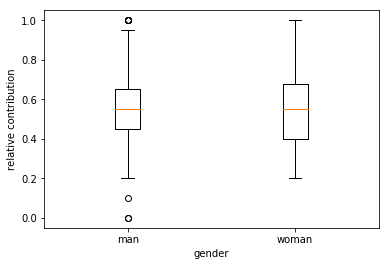

In [20]:
# relative contribution dependence on gender
data=[[],[]]
for i in range(len(userdf)):
    if (userdf.loc[i,"genere"]=="M" and userdf.loc[i,"diners_inicials"]!=0):
        data[0].append(1-userdf.loc[i,"guany_final"]/userdf.loc[i,"diners_inicials"])
    if (userdf.loc[i,"genere"]=="F" and userdf.loc[i,"diners_inicials"]!=0):
        data[1].append(1-userdf.loc[i,"guany_final"]/userdf.loc[i,"diners_inicials"])
plt.boxplot(data,positions=[0,1])
plt.xticks([0,1],["man","woman"])
plt.xlabel("gender")
plt.ylabel("relative contribution")
plt.show()

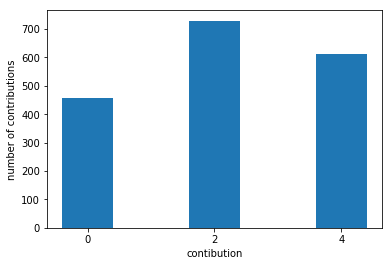

0.2544444444444444 0.405 0.34055555555555556


In [3]:
# number of contribution of each value
count=[0,0,0]
for i in range(len(userrounddf)):
    for n in range(3):
        if (userrounddf.loc[i,"option_selected"]==2*n):
            count[n]+=1
plt.bar([0,2,4],count)
plt.xticks([0,2,4],[0,2,4])
plt.xlabel("contibution")
plt.ylabel("number of contributions")
plt.show()
print(count[0]/len(userrounddf),count[1]/len(userrounddf),count[2]/len(userrounddf))

In [4]:
# Gini coefficient
def gini(dataset):
    sum1=0.0
    sum2=0.0
    n=len(dataset)
    for i in range(n):
        sum1+=dataset[i]
        for j in range(n):
            sum2+=abs(dataset[i]-dataset[j])
    gini=sum2/(2*n*sum1)
    return gini
income=[]
for k in range(len(userdf)):
    if (math.isnan(float(userdf.loc[k,"partida_id"]))==False):
        income.append(int(userdf.loc[k,"guany_final"]))
print("Gini coefficient:",gini(income))

Gini coefficient: 0.2273973085323751


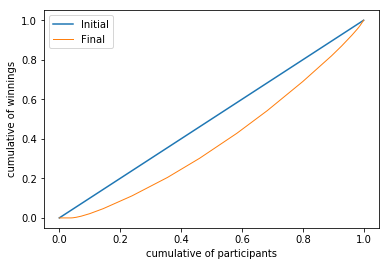

In [9]:
# Lorenz curve
def lorenz(dataset,Label):
    cumulative=[0]
    xaxis=[0]
    for i in range(len(dataset)):
        cumulative.append(cumulative[i]+dataset[i])
        xaxis.append((i+1)/len(dataset))
    for i in range(len(dataset)+1):
        cumulative[i]=cumulative[i]/max(cumulative)
    plt.plot(xaxis,cumulative,lw=1,label=Label)
    return
income=[]
for k in range(len(userdf)):
    if (math.isnan(float(userdf.loc[k,"partida_id"]))==False):
        income.append(int(userdf.loc[k,"guany_final"]))
income.sort()
plt.plot([0,1],[0,1],label="Initial")
lorenz(income,"Final")
plt.xlabel("cumulative of participants")
plt.ylabel("cumulative of winnings")
plt.legend()
plt.show()

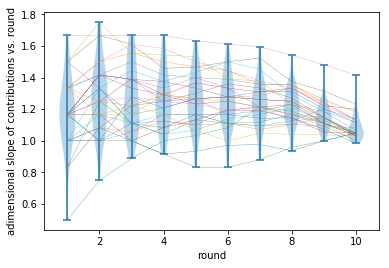

0.5 1.75


In [26]:
hurry=[[] for i in range(10)]
for n in range(len(rounddf)):
    hurry[rounddf.loc[n,"num_round"]-1].append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
plt.violinplot(hurry)
for n in range(len(rounddf)):
    if (rounddf.loc[n,"num_round"]==1):
        rlzn=[]
    rlzn.append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
    if (rounddf.loc[n,"num_round"]==10):
        plt.plot([(i+1) for i in range(10)],rlzn,lw=0.3)
plt.xlabel("round")
plt.ylabel("adimensional slope of contributions vs. round")
plt.show()
print(np.min(hurry),np.max(hurry))

In [5]:
fails=0
for k in range(len(sessiondf)):
    if(sessiondf.loc[k,"goal_reached"]==0):
        fails+=1
print(fails)

1
